# Subplots

In [35]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


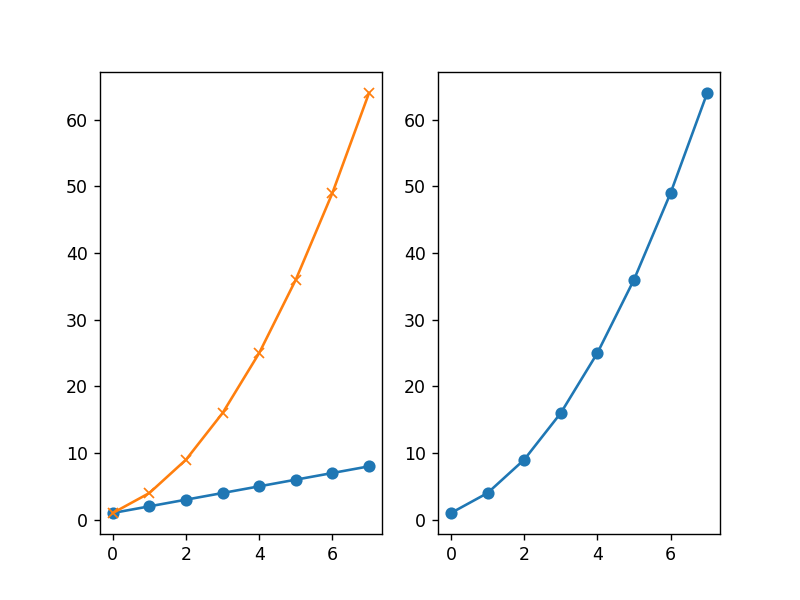

In [36]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [37]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [38]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


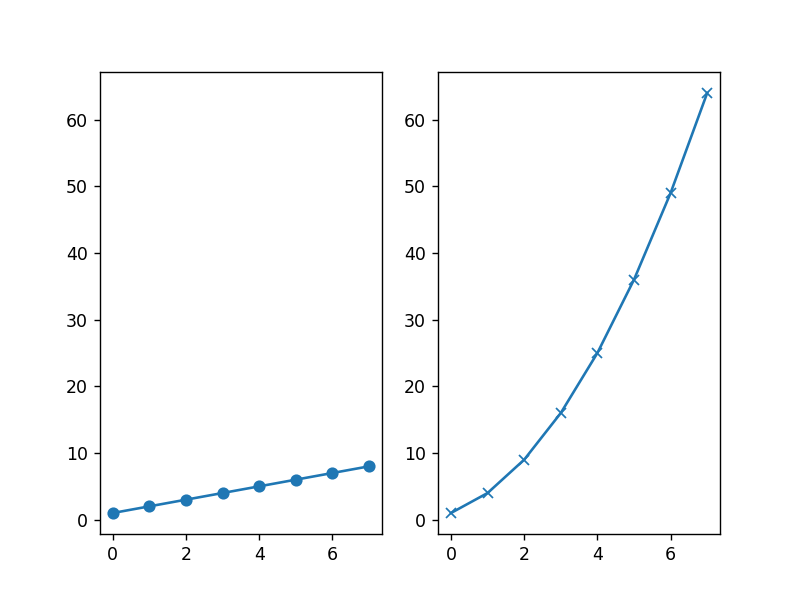

In [39]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


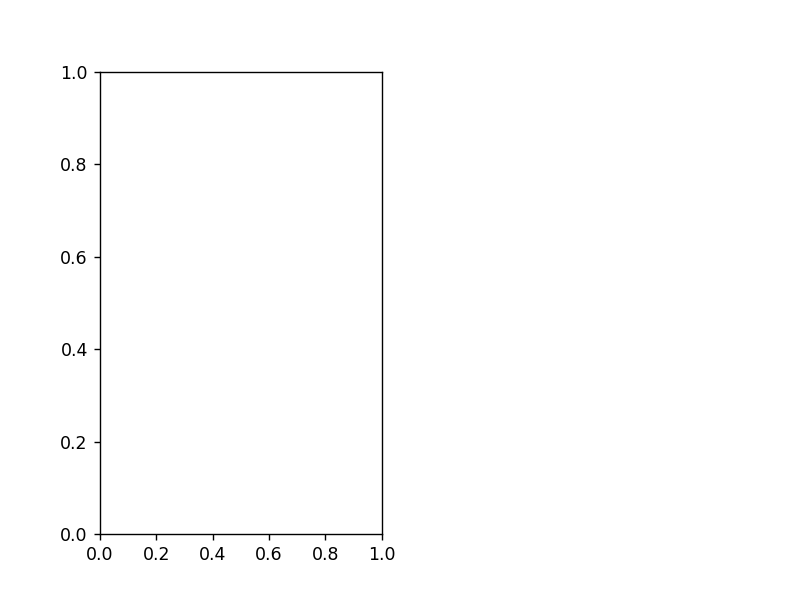

True

In [40]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


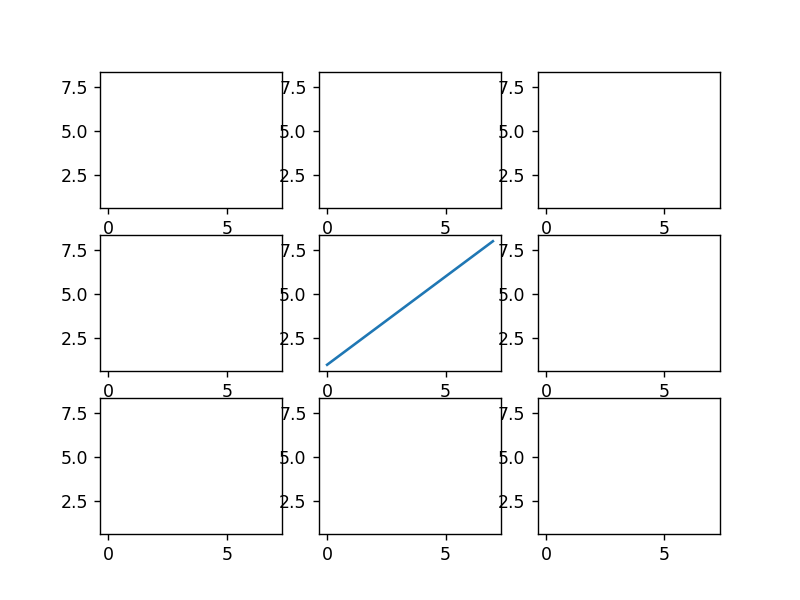

In [41]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [42]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [43]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


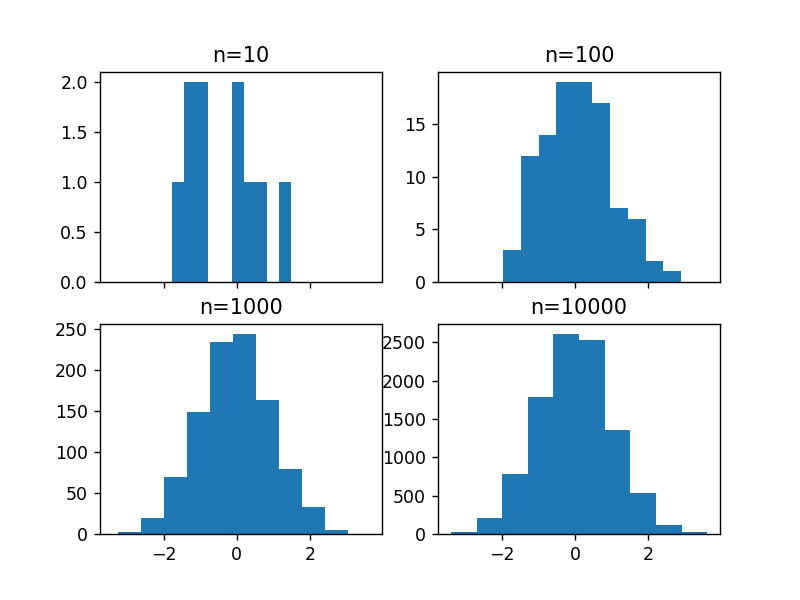

In [44]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]
#print(len(axs)) #4 hi hai

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample) #yaha bins nahi diye hai explicitly
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


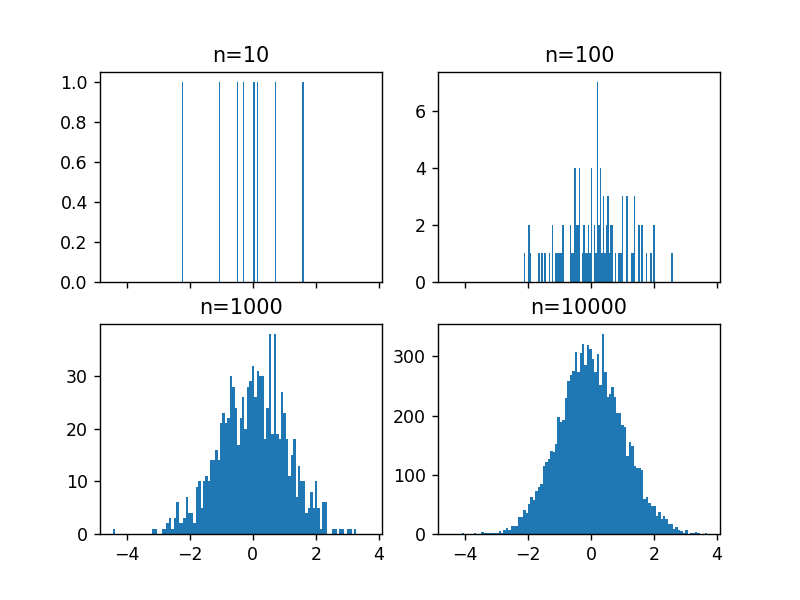

In [45]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


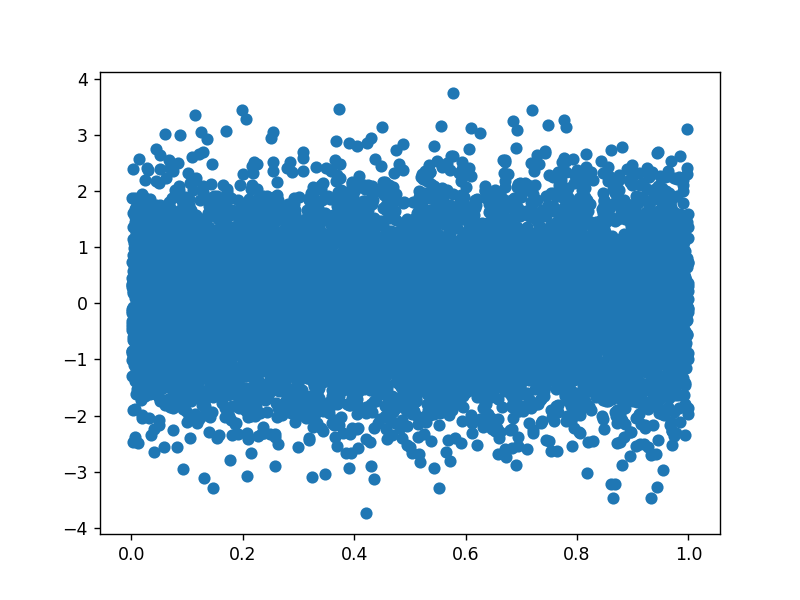

In [46]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
#print(type(X)) #pathcollection
#print(X,Y)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


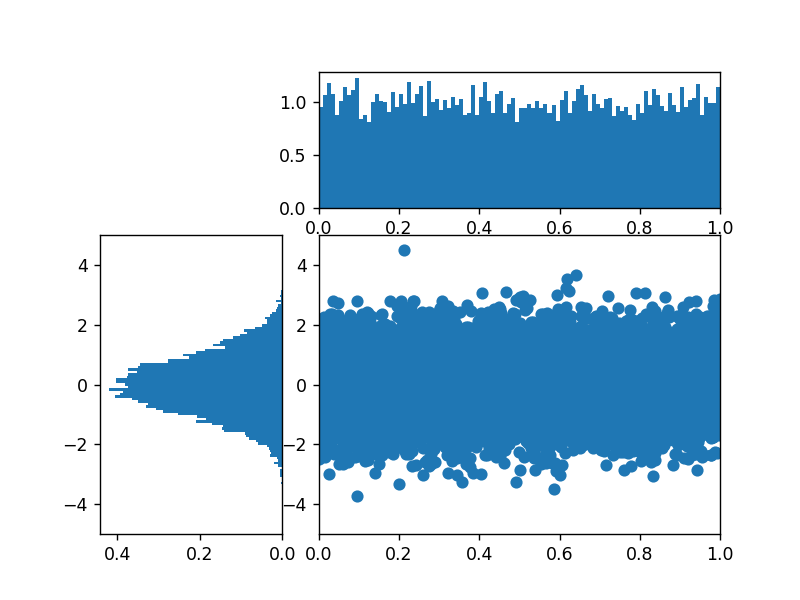

In [47]:
# use gridspec to partition the figure into subplots
# axes are spread over multiple cells in the grid
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3) #3x3 grid hai, 9 cells in total

top_histogram = plt.subplot(gspec[0, 1:]) # kaise wo space lega, wo bataya hai
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [48]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y) #original graph
top_histogram.hist(X, bins=100) #how x values are ranging
s = side_histogram.hist(Y, bins=100, orientation='horizontal') #similarly y

In [49]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [50]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

In [51]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df

,gamma,normal,random
0,2.119980,0.650207,0.790419
1,1.718227,1.192159,0.323571
2,3.260389,-0.100569,0.019584
3,0.378019,0.883935,0.663353
4,0.235404,1.111716,0.128969
5,1.331828,1.045865,0.547579
6,2.139128,-0.902773,0.373902
7,3.032883,3.183715,0.607877
8,2.288176,0.247031,0.184313
9,2.030304,-0.912431,0.628439


In [52]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.992537,0.012477,0.497392
std,1.410713,1.003240,0.288886
min,0.017412,-4.871382,0.000013
25%,0.955693,-0.675719,0.246801
50%,1.678767,0.009245,0.495249
75%,2.679935,0.686885,0.744701
max,13.333493,3.462881,0.999869


<IPython.core.display.Javascript object>


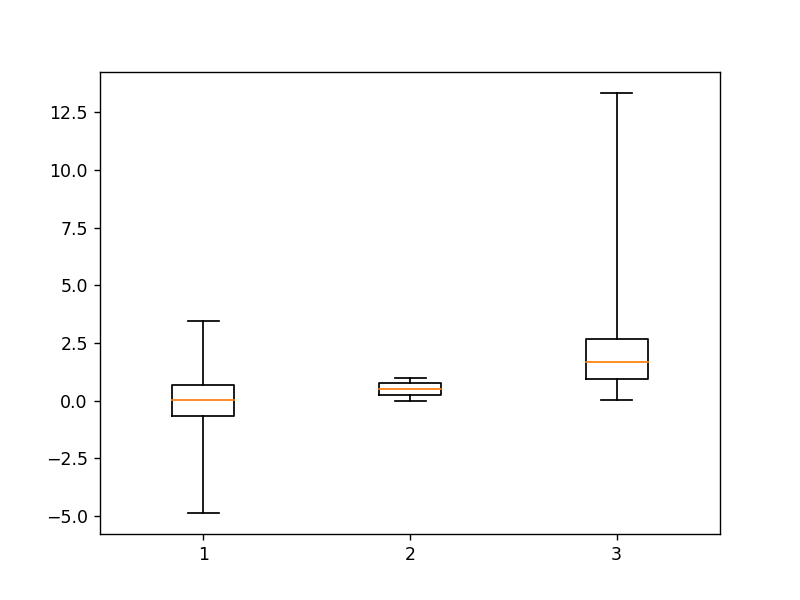

In [53]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')
#_ = plt.boxplot(df['normal'])#, whis='range')

In [54]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


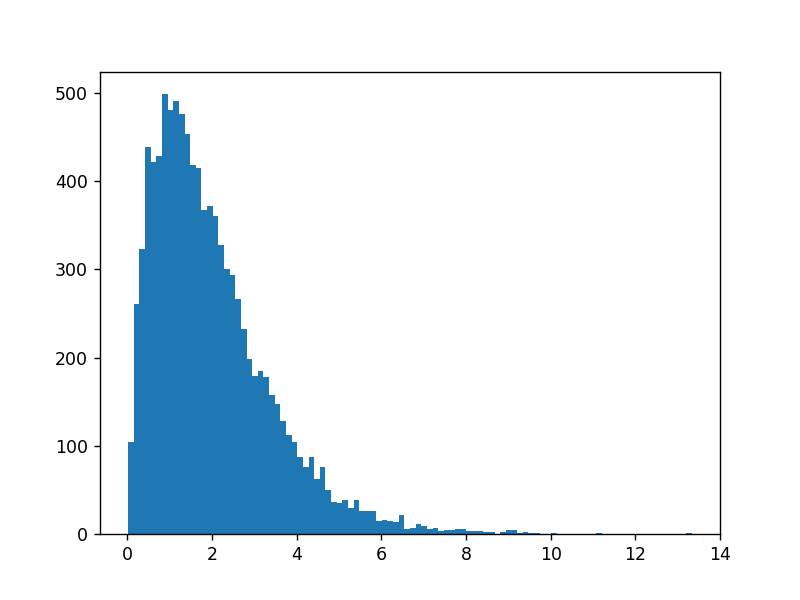

In [55]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

# one plot inside another

<IPython.core.display.Javascript object>


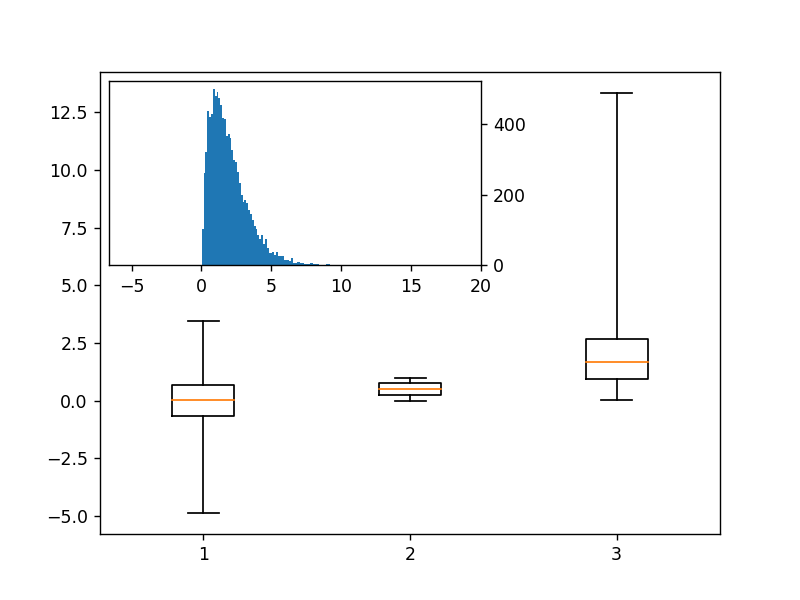

In [56]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2) #sirf naya plot bata rahe hai kasia rahega
ax2.hist(df['gamma'], bins=100)#wo area me graph dala hai
ax2.margins(x=0.5)

In [57]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


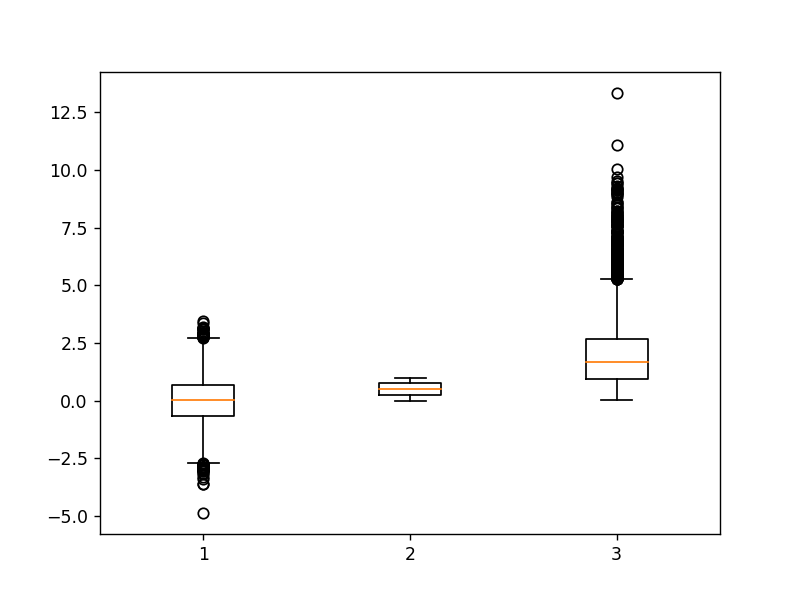

In [58]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


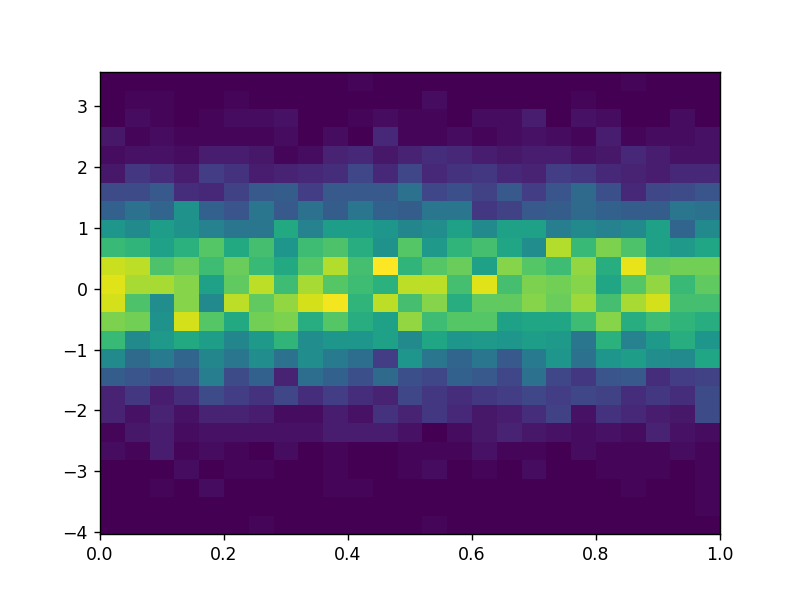

In [59]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


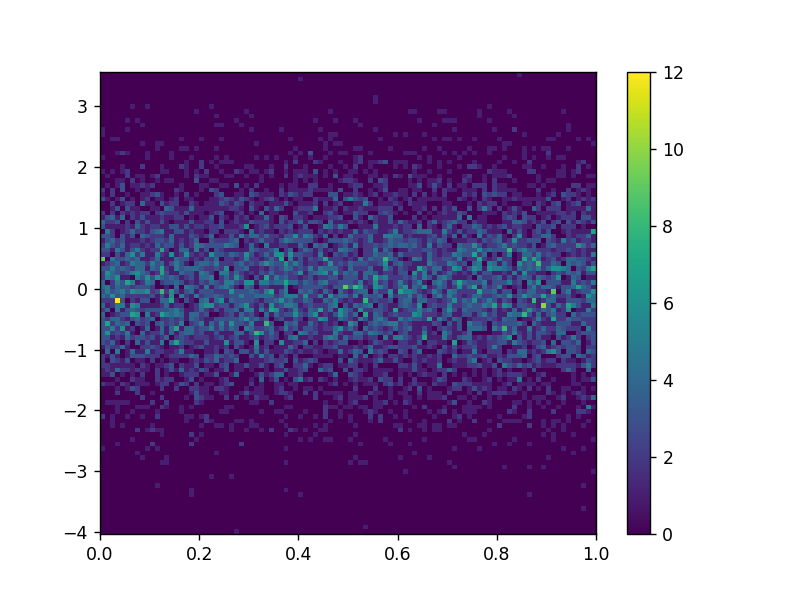

In [60]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [61]:
# add a colorbar legend
plt.colorbar()

# Animations

In [62]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
x

array([ 0.07508884,  0.21662713, -0.48952898,  0.38111877,  0.17529438,
        0.36103162, -1.24449016,  0.64818404, -1.67501909, -1.17712262,
        1.02871572,  0.26279544,  0.56296996,  0.49501227, -1.35391223,
       -1.53077824, -0.40626797,  0.02343023, -0.66904933,  1.14807062,
        0.59182601, -0.05418276,  1.14479483, -0.92149273, -0.82305458,
        0.14916072,  0.53830952,  0.13332028, -0.25775893, -0.22568264,
       -1.64198785, -1.36857986, -0.01945974,  0.50248234, -0.37476209,
        0.94919751, -0.09507227, -1.4196509 , -0.34998583, -0.18626752,
        0.50643112, -0.07157164,  1.00010862,  0.2853708 , -1.46735373,
        0.4095192 ,  0.07757168, -1.30394967, -0.08432428, -0.42277714,
        0.38214212,  0.14056437,  0.45297171,  0.13328708, -1.44728512,
        0.27862731,  1.91554451,  1.11294524,  0.98580347, -1.06105595,
       -0.30830643,  0.48684993,  0.40897731, -0.89235429,  0.24047118,
        0.30339611,  2.14122544, -0.9507331 , -0.93776789, -1.41

In [63]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla() #clear plots
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30]) #axis fixed rahe, nahi to har baar resize hote hai
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27]) #yahi to hai animation , [3,27] me hi ache se kaam karta hai
    #plt.annotate?

<IPython.core.display.Javascript object>


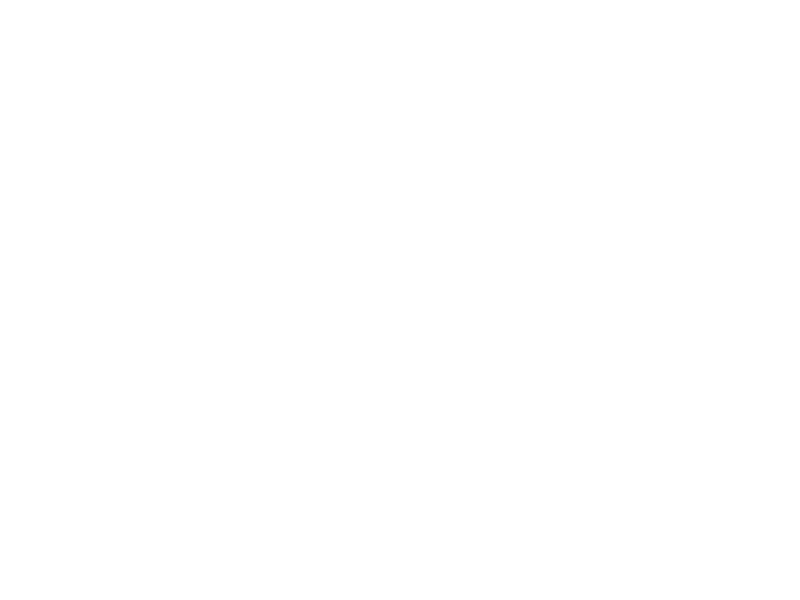

In [64]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


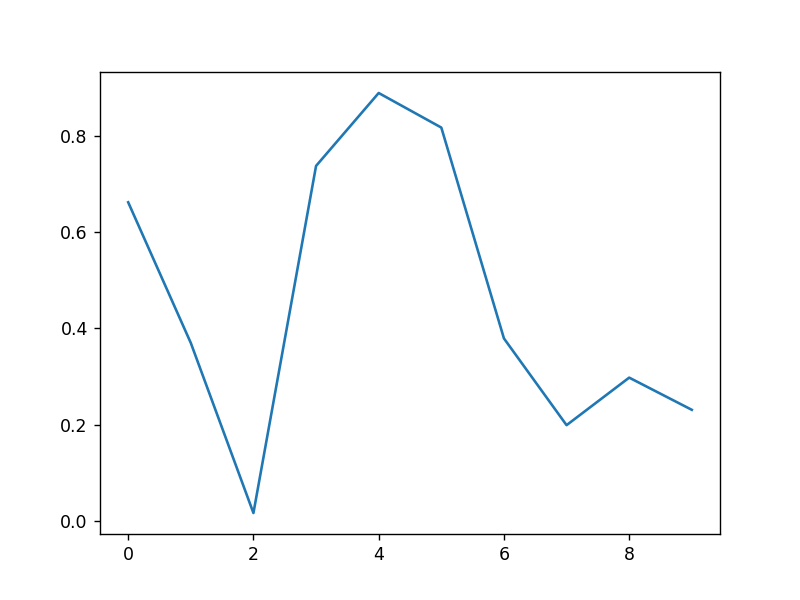

7

In [65]:
plt.figure()
data = np.random.rand(10)
#print(data)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    #print(event.x, event.y, event.xdata, event.ydata)

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [66]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.159941,USA,0.097268
1,0.767231,Mexico,0.708096
2,0.762833,China,0.176394
3,0.286664,Germany,0.836416
4,0.505231,Brazil,0.868108
5,0.372722,Iraq,0.557958
6,0.017207,Chile,0.475178
7,0.066697,Canada,0.562777
8,0.794257,UK,0.777584
9,0.280854,India,0.438504


<IPython.core.display.Javascript object>


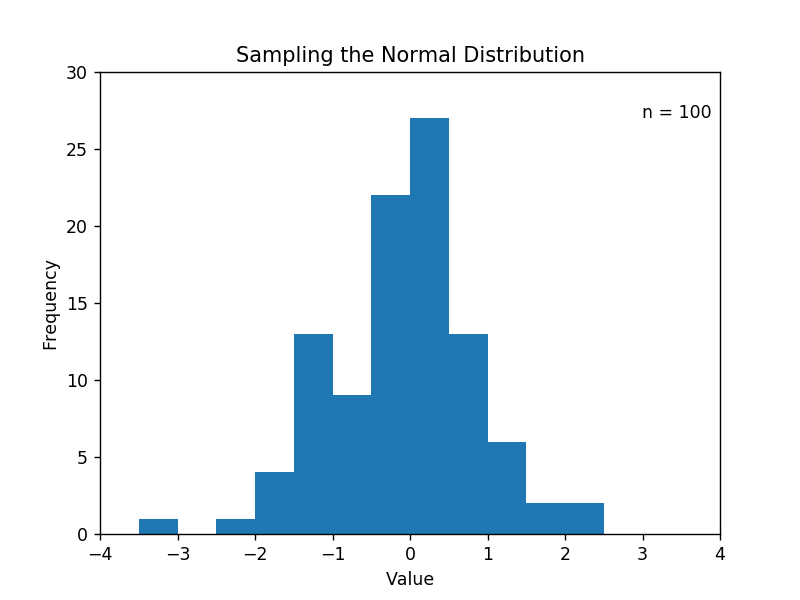

In [67]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [68]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin'] #ye nahi samjha
    #print(df.iloc[event])
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7